In [20]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import fmin_tnc

In [7]:
def load_data(path, header):
    marks_df = pd.read_csv(path, header=header)
    return marks_df

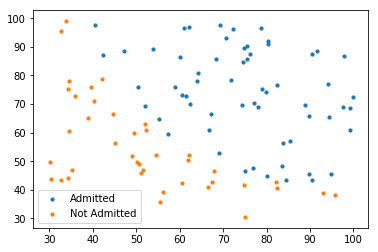

In [9]:
data = load_data("datasets/LogReg/logreg.txt", None)

X = data.iloc[:, :-1]
y = data.iloc[:, -1]

admitted = data.loc[y == 1]
not_admitted = data.loc[y == 0]

plt.scatter(admitted.iloc[:, 0], admitted.iloc[:, 1], s=10, label='Admitted')
plt.scatter(not_admitted.iloc[:, 0], not_admitted.iloc[:, 1], s=10, label='Not Admitted')
plt.legend()
plt.show()

In [11]:
X = np.c_[np.ones((X.shape[0], 1)), X]
y = y[:, np.newaxis]
theta = np.zeros((X.shape[1], 1))

In [12]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def net_input(theta, x):
    return np.dot(x, theta)

def probability(theta, x):
    return sigmoid(net_input(theta, x))

In [30]:
def cost_function(theta, x, y):
    m = x.shape[0]
    total_cost = - (1/m) * np.sum(y * np.log(probability(theta, x)) + (1 - y) * np.log(1 - probability(theta, x)))
    return total_cost

In [32]:
def gradient(theta, x, y):
    m = x.shape[0]
    return (1/m) * np.dot(x.T, sigmoid(net_input(theta, x)) - y)

In [33]:
def fit(x, y, theta):
    opt_weights = fmin_tnc(func=cost_function, x0=theta, fprime=gradient, args=(x, y.flatten()))
    
    return opt_weights

In [40]:
def fit(x, y, theta):
    opt_weights = fmin_tnc(func=cost_function, x0=theta,
                  fprime=gradient,args=(x, y.flatten()))
    return opt_weights

In [41]:
parameters = fit(X, y, theta)

In [44]:
parameters = [-25.16131856, 0.20623159, 0.20147149]

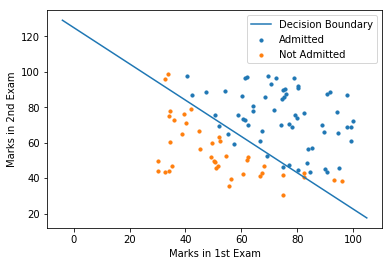

In [46]:
x_values = [np.min(X[:, 1] - 5), np.max(X[:, 2] + 5)]
y_values = - (parameters[0] + np.dot(parameters[1], x_values)) / parameters[2]

plt.plot(x_values, y_values, label='Decision Boundary')
plt.scatter(admitted.iloc[:, 0], admitted.iloc[:, 1], s=10, label='Admitted')
plt.scatter(not_admitted.iloc[:, 0], not_admitted.iloc[:, 1], s=10, label='Not Admitted')
plt.xlabel('Marks in 1st Exam')
plt.ylabel('Marks in 2nd Exam')
plt.legend()
plt.show()